## Data Analysis with Pandas

Data can often be stored in a multiple of file formats:

- Excel spreadsheets (`.xlsx`);
- Comma seperated files (`.csv`);
- Json (`.json`);
- ...

Simlarly you might want to store data in any of the above data formats. This is where the [Pandas](http://pandas.pydata.org/) library can be useful:

> "... easy-to-use data structures and data analysis tools for the Python programming language."

In this section we will see how to:

- Read in data files;
- Query those data files;
- Write to data files.

## Reading in data files

Consider the file [goldbach.xlsx](data/goldbach.xlsx) which contains rows of data confirming the [Goldbach conjecture](https://en.wikipedia.org/wiki/Goldbach's_conjecture):

> Every even integer greater than 2 can be expressed as the sum of two primes.

The data is made up of 3 columns: $N$, $a$ and $b$ and there is a row for every possible expression of $N = a + b$ for $a \leq b$ prime. Note that this data was made using [Appendix A](A1 - Appendix creating Goldbach data.ipynb).

Let us start by importing Pandas and reading in the data file. To do this you will need to know the path to the file on your computer:

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data/goldbach.xlsx")

This reads in the excel file as a Pandas data frame. Let us take a look at the first few rows of the data frame (the `head`):

In [3]:
df.head()

,N,a,b
0,4,2,2
1,6,3,3
2,8,3,5
3,10,3,7
4,10,5,5


Let us look at the last few rows (the `tail`):

In [4]:
df.tail()

,N,a,b
2591,500,151,349
2592,500,163,337
2593,500,193,307
2594,500,223,277
2595,500,229,271


## Querying our data

A quick way of getting a summary of the data we have is with `.describe()`:

In [5]:
df.describe()

,N,a,b
count,2596.000000,2596.000000,2596.000000
mean,311.466872,72.297766,239.169106
std,127.817425,58.087254,111.180401
min,4.000000,2.000000,2.000000
25%,214.000000,23.000000,157.000000
50%,329.000000,59.000000,239.000000
75%,420.000000,107.000000,317.000000
max,500.000000,241.000000,491.000000


Although in this particular data set that is not terribly useful, that's more useful in the case of statistical analysis.

Let us take a closer look at a specific number ($N=322$) and the ways it can be written as the sum of two primes.

In [6]:
df[df['N'] == 322]

,N,a,b
1250,322,5,317
1251,322,11,311
1252,322,29,293
1253,322,41,281
1254,322,53,269
1255,322,59,263
1256,322,71,251
1257,322,83,239
1258,322,89,233
1259,322,131,191


To briefly explain what is happening there: `df['N'] == 322` is returning a series of `True` and `False`, identify the positions in our data where $N=322$. We directly pass that series to the data frame to get out those numbers `df[df['N'] == 322]`.

Let us find out how many decompositions exist for each number in our data frame. We will do this using the `value_counts()` statement:

In [7]:
s = df['N'].value_counts()
s

420    30
480    29
462    28
450    27
390    27
456    24
468    24
330    24
486    23
474    23
498    23
360    22
492    22
378    22
414    21
444    21
300    21
438    21
426    21
396    21
324    20
408    20
354    20
490    19
336    19
294    19
210    19
270    19
432    19
384    19
       ..
58      4
80      4
88      4
92      4
152     4
42      4
26      3
30      3
24      3
40      3
22      3
98      3
52      3
56      3
62      3
128     3
44      3
38      2
18      2
10      2
14      2
16      2
20      2
68      2
28      2
32      2
12      1
8       1
6       1
4       1
Name: N, Length: 249, dtype: int64

The above is a series (ordered by count), let us rename the count variable and create a new dataframe:

In [8]:
df = pd.DataFrame(s.rename('counts'))
df.head()

,counts
420,30
480,29
462,28
450,27
390,27


We have created a dataframe with an index given by `N`. Let us create a new variable which is the normalised count:

In [9]:
df["normalised_counts"] = df['counts'] / df.index

In [10]:
df.head()

,counts,normalised_counts
420,30,0.071429
480,29,0.060417
462,28,0.060606
450,27,0.060000
390,27,0.069231


We could now look a bit closer at this using `describe`:

In [11]:
df.describe()

,counts,normalised_counts
count,249.000000,249.000000
mean,10.425703,0.051769
std,5.897948,0.029921
min,1.000000,0.017588
25%,6.000000,0.030973
50%,9.000000,0.044776
75%,13.000000,0.062500
max,30.000000,0.250000


We can also directly plot our data, but just as when we used Sympy we need to tell Jupyter to display the plots in the notebook:

In [12]:
%matplotlib inline

Here is a quick histogram of the counts:

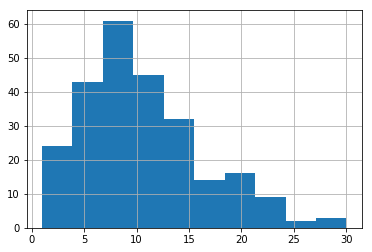

In [13]:
df['counts'].hist();

The normalised counts:

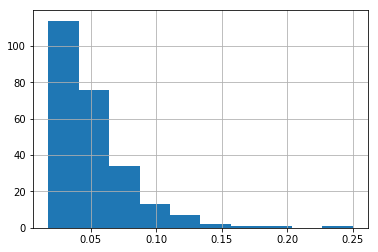

In [14]:
df['normalised_counts'].hist();

## Writing our data to files

Finally let us write this data to a 'comma seperated value' (`.csv`) in case we wanted to look at it later:

In [15]:
df.to_csv("data/goldbach_counts.csv")

## Summary

This section briefly showed us how to use pandas to read, manipulate and write data. We also took a brief look at plotting with pandas but this should only be used in an exploratary way. For higher quality plots [matplotlib](http://matplotlib.org/) is recommended.